In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df= pd.read_csv('metadata.csv')
df_binary=df[['smoke', 'drink', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'biopsed']]
df.dropna(inplace=True)
df['img_id'].to_csv('pictures')

In [2]:
def binarise(df, col):
    for columns in col:
        df[columns]= np.where(df[columns]==True, 1, 0)
    return df

col_bool=['smoke', 'drink', 'pesticide', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system','biopsed']
binarise(df, col_bool)

def binarise_str(df, col):
    for columns in col:
        df[columns]=np.where(df[columns]=='True',1,0)
    return df

col_str=['itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation']
binarise_str(df, col_str)

df['gender']= np.where(df['gender']=='FEMALE', 1, 0)
df['diagnostic']=np.where((df['diagnostic']=='BCC') ^ (df['diagnostic']=='MEL') ^ (df['diagnostic']=='SCC'), 1, 0)
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,0,0,POMERANIA,POMERANIA,55,0,1,1,...,5.0,1,1,1,0,1,1,1,PAT_46_881_939.png,1
4,PAT_684,1302,0,1,POMERANIA,POMERANIA,79,0,0,1,...,5.0,1,1,1,0,0,1,1,PAT_684_1302_588.png,1
6,PAT_778,1471,0,1,GERMANY,ITALY,52,0,1,0,...,10.0,1,0,1,0,1,1,1,PAT_778_1471_835.png,1
7,PAT_117,179,0,0,POMERANIA,POMERANIA,74,1,1,0,...,10.0,1,1,1,1,0,1,1,PAT_117_179_983.png,1
9,PAT_705,4015,0,1,GERMANY,GERMANY,58,1,1,1,...,7.0,0,0,1,0,0,0,0,PAT_705_4015_413.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,1,0,POMERANIA,POMERANIA,66,0,0,1,...,15.0,0,1,0,1,0,1,1,PAT_386_785_536.png,1
2291,PAT_273,421,0,0,POMERANIA,POMERANIA,41,1,0,0,...,5.0,1,1,0,1,0,1,1,PAT_273_421_905.png,1
2292,PAT_491,934,0,0,POMERANIA,POMERANIA,43,1,1,1,...,5.0,1,1,0,0,0,1,1,PAT_491_934_46.png,1
2294,PAT_46,880,0,0,POMERANIA,POMERANIA,55,0,1,1,...,12.0,1,1,1,0,1,0,0,PAT_46_880_140.png,1


In [3]:
columns_to_drop=['img_id', 'background_father', 'background_mother', 'lesion_id', 'patient_id', 'biopsed']
df= df.drop(columns=columns_to_drop)


In [4]:
df

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
1,0,0,55,0,1,1,1,1,1,3.0,NECK,6.0,5.0,1,1,1,0,1,1,1
4,0,1,79,0,0,1,0,0,0,1.0,FOREARM,5.0,5.0,1,1,1,0,0,1,1
6,0,1,52,0,1,0,1,1,1,3.0,FACE,15.0,10.0,1,0,1,0,1,1,1
7,0,0,74,1,1,0,0,0,0,1.0,FACE,15.0,10.0,1,1,1,1,0,1,1
9,0,1,58,1,1,1,1,1,1,1.0,FOREARM,9.0,7.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,1,0,66,0,0,1,0,1,1,2.0,EAR,20.0,15.0,0,1,0,1,0,1,1
2291,0,0,41,1,0,0,0,0,0,2.0,FACE,9.0,5.0,1,1,0,1,0,1,1
2292,0,0,43,1,1,1,1,0,0,2.0,FACE,9.0,5.0,1,1,0,0,0,1,1
2294,0,0,55,0,1,1,1,1,1,3.0,CHEST,13.0,12.0,1,1,1,0,1,0,0


c:\Users\anna-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


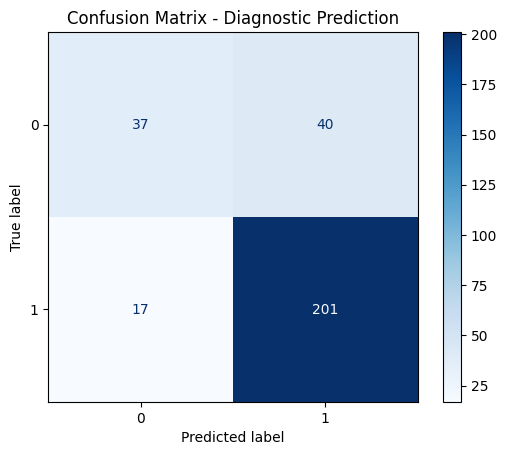

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.48      0.56        77
           1       0.83      0.92      0.88       218

    accuracy                           0.81       295
   macro avg       0.76      0.70      0.72       295
weighted avg       0.80      0.81      0.79       295



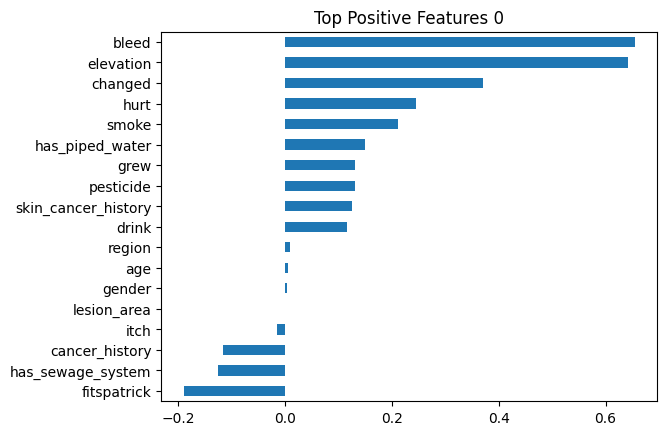

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_cols = ['gender', 'fitspatrick', 'region', 'diagnostic']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Create lesion area
df['lesion_area'] = abs(df['diameter_1'] - df['diameter_2'])

df.drop(columns=['diameter_2', 'diameter_1'], inplace= True)
x=df.drop(columns=['diagnostic'])
y=df['diagnostic']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(        #split
    x, y, test_size=0.2, stratify=y
)

from sklearn.linear_model import LogisticRegression

model= LogisticRegression(multi_class='multinomial', 
                          solver='lbfgs',
                          max_iter=1000)

model.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix - Diagnostic Prediction")
plt.show()

print(f"Classification Report: {classification_report(y_test, y_pred)}")
# print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

feature_names = df.drop(columns=['diagnostic']).columns
feature_importance=pd.DataFrame(
    model.coef_.T, columns=[f"Class {i}" for i in range(model.coef_.shape[0])],
    index=feature_names
)

for i in range(feature_importance.shape[1]):
    feature_importance.iloc[:, i].sort_values(ascending=False).plot(kind='barh')
    plt.title(f"Top Positive Features {i}")
    plt.gca().invert_yaxis()
    plt.show()


In [6]:
correlation= df.corr(method='pearson')
correlation

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diagnostic,itch,grew,hurt,changed,bleed,elevation,lesion_area
smoke,1.000000,0.177542,0.104356,0.066753,-0.194269,-0.057428,-0.017709,0.067195,0.055092,-0.015127,-0.014770,0.102218,0.060642,0.016277,0.031873,0.022869,0.015182,0.074609,0.013421
drink,0.177542,1.000000,-0.135852,0.196140,-0.360684,-0.024904,0.032358,-0.073909,-0.030090,0.020082,-0.093763,0.046838,-0.113684,0.008842,0.023252,0.012262,-0.001482,0.027320,-0.052735
age,0.104356,-0.135852,1.000000,-0.194504,-0.010266,-0.077799,0.016464,0.071028,0.083723,-0.165669,0.092593,0.110666,0.169628,-0.001451,0.087702,-0.013161,0.070631,0.075109,-0.057074
pesticide,0.066753,0.196140,-0.194504,1.000000,-0.308814,0.052705,0.007980,-0.139096,-0.113517,0.062310,-0.061136,0.050848,0.044355,0.068581,0.051486,0.032444,0.039453,-0.021170,0.022773
gender,-0.194269,-0.360684,-0.010266,-0.308814,1.000000,0.077291,0.072720,-0.018258,0.017556,0.050264,0.124501,-0.083864,-0.068758,-0.002745,-0.067729,0.008335,-0.069599,-0.050528,0.020933
skin_cancer_history,-0.057428,-0.024904,-0.077799,0.052705,0.077291,1.000000,0.025044,-0.027458,-0.047964,-0.007904,-0.022851,0.035046,0.059996,-0.012075,0.026301,-0.007884,0.023808,0.009723,-0.071915
cancer_history,-0.017709,0.032358,0.016464,0.007980,0.072720,0.025044,1.000000,0.045708,0.040828,0.035429,-0.021556,-0.024908,-0.026317,0.055227,0.059743,0.018661,0.013960,-0.043226,-0.065297
has_piped_water,0.067195,-0.073909,0.071028,-0.139096,-0.018258,-0.027458,0.045708,1.000000,0.750902,0.091675,-0.011698,-0.015356,0.023506,-0.073267,-0.023836,0.005582,-0.013579,0.013816,-0.004379
has_sewage_system,0.055092,-0.030090,0.083723,-0.113517,0.017556,-0.047964,0.040828,0.750902,1.000000,0.133850,0.046858,-0.035594,0.000141,-0.098375,-0.028757,0.055388,-0.046882,0.015547,-0.005080
fitspatrick,-0.015127,0.020082,-0.165669,0.062310,0.050264,-0.007904,0.035429,0.091675,0.133850,1.000000,0.021154,-0.113090,-0.063977,0.084571,-0.074669,0.049008,-0.045696,-0.027437,-0.012973


<Axes: >

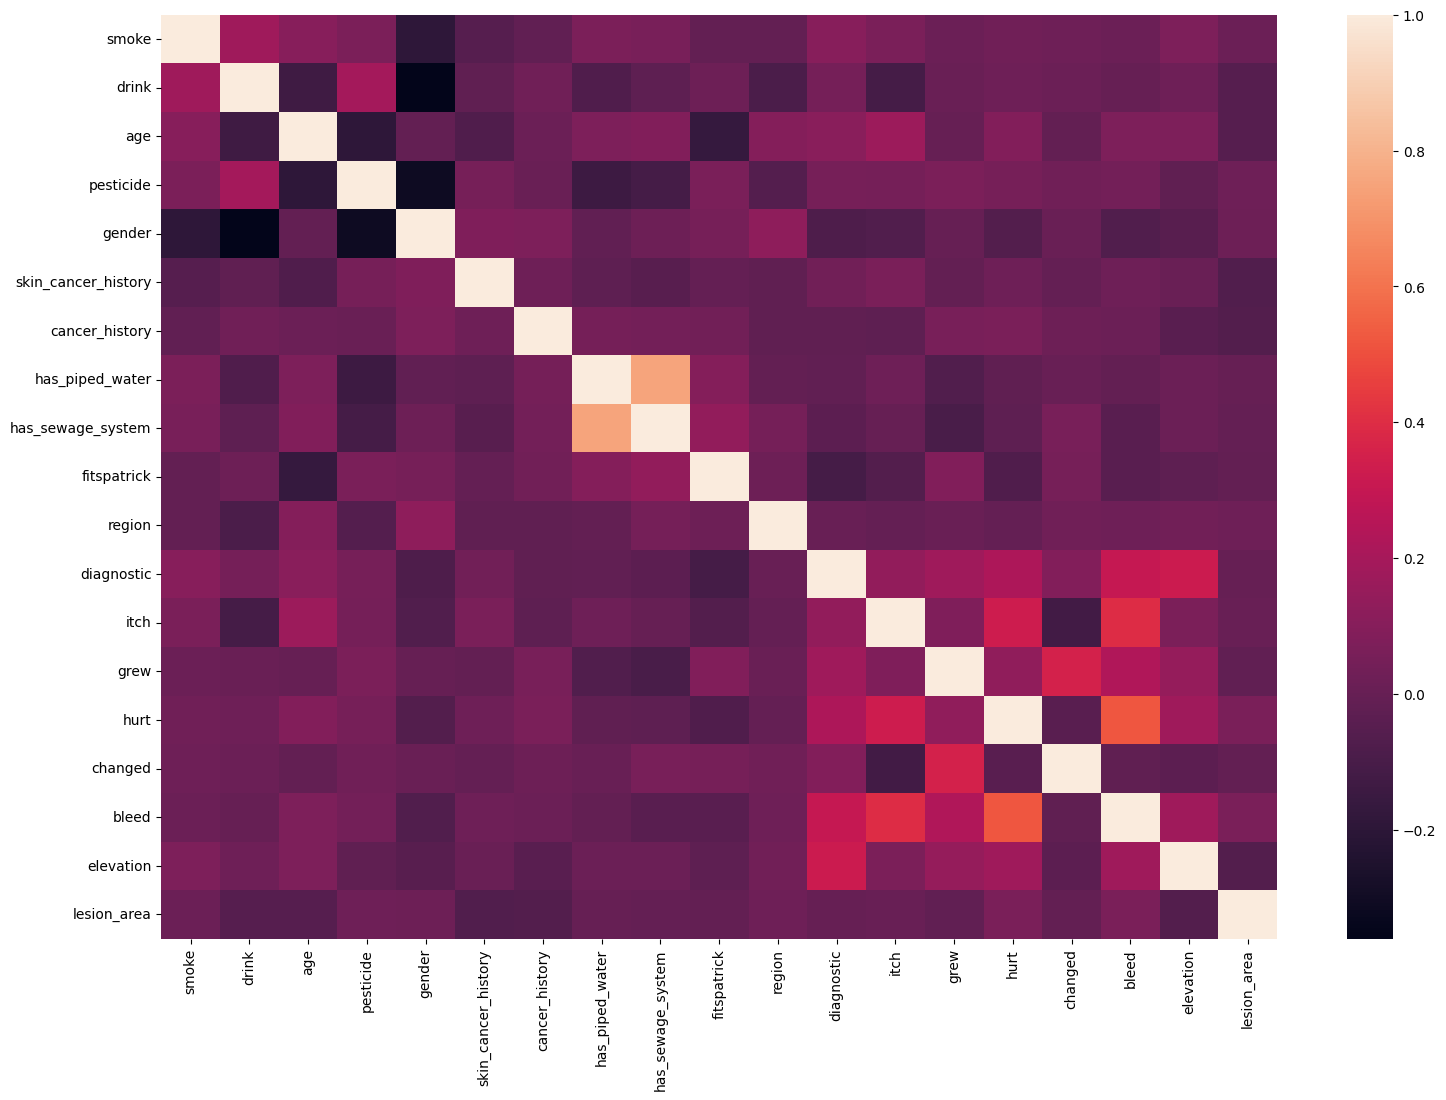

In [7]:
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(correlation)